In [64]:
import pandas as pd
import numpy as np

data = {
    "games": pd.read_csv("games.csv"),
    "wellness": pd.read_csv("wellness.csv"),
    "rpe": pd.read_csv("rpe.csv"),
    "gps": pd.read_csv("gps.csv")
}
total_data = pd.read_csv("wellness.csv")

In [65]:
for key, df in data.items():
    for colName in df:
        total_data[colName] = df[colName]
    print("\n#####   " + key.capitalize() + "   #####")
    display(df.head())


#####   Games   #####


,GameID,Date,Tournament,TournamentGame,Team,Opponent,Outcome,TeamPoints,TeamPointsAllowed
0,1,2017-11-30,Dubai,1,Canada,Spain,W,19,0
1,2,2017-11-30,Dubai,2,Canada,Ireland,W,31,0
2,3,2017-11-30,Dubai,3,Canada,Fiji,W,31,14
3,4,2017-12-01,Dubai,4,Canada,France,W,24,19
4,5,2017-12-01,Dubai,5,Canada,Australia,L,7,25



#####   Wellness   #####


,Date,PlayerID,Fatigue,Soreness,Desire,Irritability,BedTime,WakeTime,SleepHours,SleepQuality,MonitoringScore,Pain,Illness,Menstruation,Nutrition,NutritionAdjustment,USGMeasurement,USG,TrainingReadiness
0,2018-07-21,1,3,3,2,3,23:00:00,07:00:00,8.00,2,13,No,No,Yes,Excellent,Yes,No,NaN,0%
1,2018-07-21,2,4,3,4,4,23:00:00,07:00:00,8.00,4,19,Yes,No,Yes,NaN,NaN,Yes,1.010,0%
2,2018-07-21,3,3,3,5,4,22:30:00,06:30:00,8.00,4,19,No,No,No,NaN,NaN,Yes,1.016,100%
3,2018-07-21,4,2,3,5,4,00:30:00,07:00:00,6.50,1,15,No,No,Yes,Excellent,Yes,Yes,1.025,95%
4,2018-07-21,5,5,3,4,4,23:45:00,07:00:00,7.25,4,20,No,No,No,Okay,Yes,Yes,1.022,100%



#####   Rpe   #####


,Date,PlayerID,Training,SessionType,Duration,RPE,SessionLoad,DailyLoad,AcuteLoad,ChronicLoad,AcuteChronicRatio,ObjectiveRating,FocusRating,BestOutOfMyself
0,2018-07-21,13,Yes,Mobility/Recovery,5.0,0.0,0.0,446.0,323.1,303.25,1.07,NaN,NaN,Not at all
1,2018-07-21,13,Yes,Game,29.0,7.0,203.0,NaN,NaN,NaN,NaN,NaN,NaN,Not at all
2,2018-07-21,13,Yes,Game,27.0,9.0,243.0,NaN,NaN,NaN,NaN,NaN,NaN,Not at all
3,2018-07-20,11,Yes,Game,36.0,6.0,216.0,534.0,256.3,344.18,0.74,9.0,10.0,Absolutely
4,2018-07-20,11,Yes,Game,36.0,8.0,288.0,NaN,NaN,NaN,NaN,9.0,10.0,Absolutely



#####   Gps   #####


,GameID,Half,PlayerID,FrameID,Time,GameClock,Speed,AccelImpulse,AccelLoad,AccelX,AccelY,AccelZ,Longitude,Latitude
0,1,1,2,1,00:22:01,00:00:00,0.658334,0.611112,0.005330,0.13250,0.69875,0.56500,55.466666,24.994873
1,1,1,2,2,00:22:01,00:00:00,0.594445,0.638889,0.006568,0.11125,0.92000,0.70625,55.466666,24.994874
2,1,1,2,3,00:22:01,00:00:00,0.363889,2.305557,0.003114,0.01375,0.77000,0.67750,55.466667,24.994874
3,1,1,2,4,00:22:01,00:00:00,0.444445,0.805556,0.002602,0.00625,0.88625,0.59500,55.466667,24.994874
4,1,1,2,5,00:22:01,00:00:00,0.400000,0.444445,0.003813,-0.01750,0.85750,0.57375,55.466668,24.994874


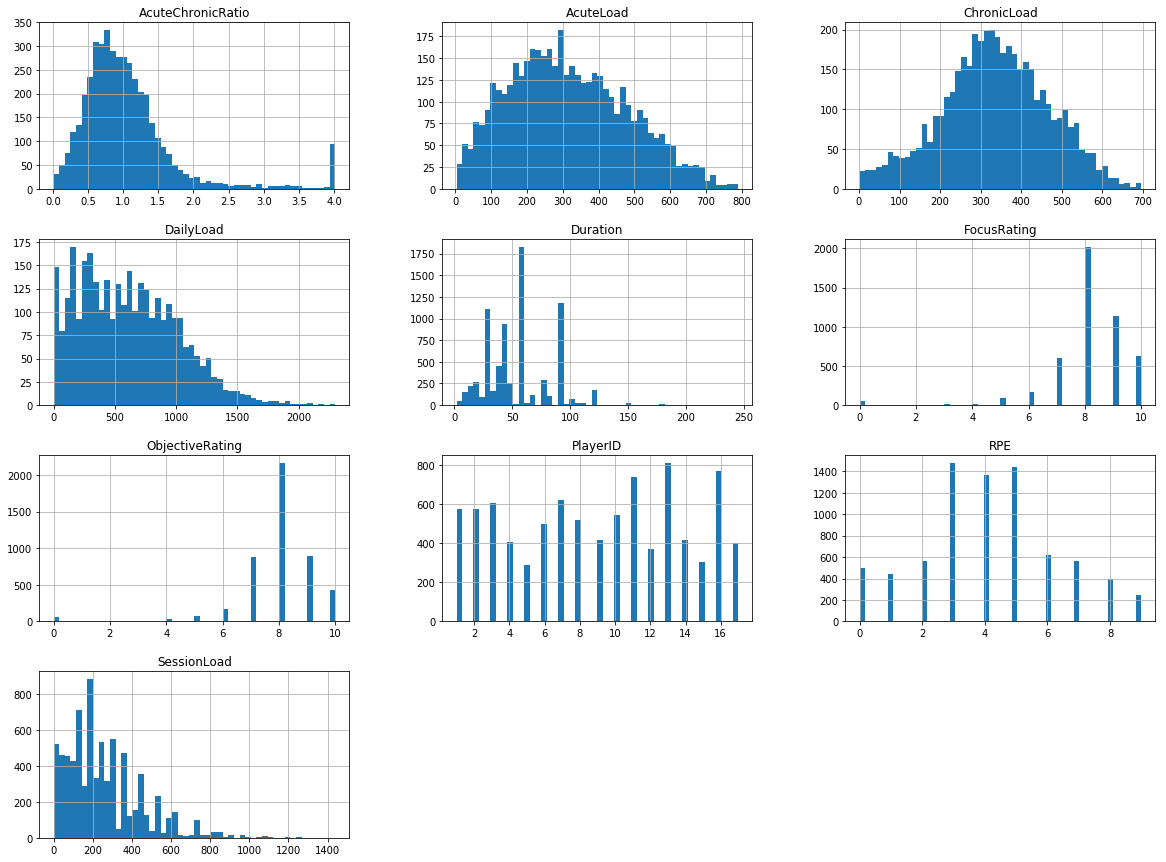

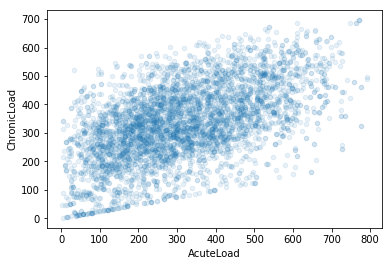

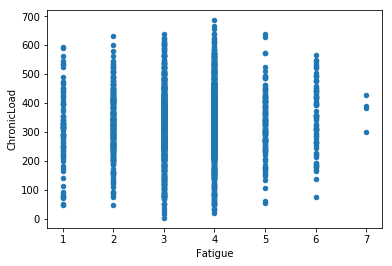

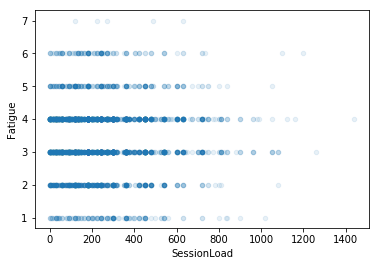

In [67]:
# Display basic data

%matplotlib inline
import matplotlib.pyplot as plt
data['rpe'].hist(bins = 50, figsize = (20, 15))
plt.show()

data['rpe'].plot(kind = "scatter", x = "AcuteLoad", y = "ChronicLoad", alpha = 0.1)

total_data.plot(kind = "scatter", x = "Fatigue", y = "ChronicLoad")

data['rpe']["Fatigue"] = total_data["Fatigue"]

data['rpe'].plot(kind = "scatter", x = "SessionLoad", y = "Fatigue", alpha = 0.1)

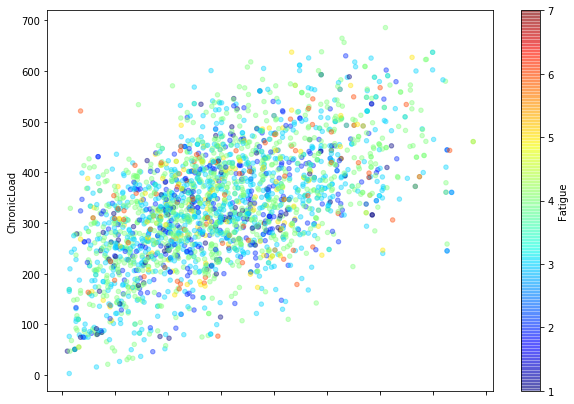

In [68]:
# Plotting AcuteLoad vs ChronicLoad in terms of Fatigue
total_data.plot(kind = "scatter", x = "AcuteLoad", y = "ChronicLoad", alpha = 0.4, figsize = (10, 7),
             c = "Fatigue", cmap = plt.get_cmap("jet"), colorbar = True)

In [143]:
# See the relation of Fatigue to other factors
corr_mtx = data['wellness'].corr()
for col in corr_mtx:
    print("\n#####   " + col.capitalize() + "   #####\n")
    print(corr_mtx[col].sort_values(ascending=True))


#####   Playerid   #####

Soreness          -0.023021
Irritability      -0.017140
Fatigue            0.014598
MonitoringScore    0.052164
SleepQuality       0.056373
SleepHours         0.145862
Desire             0.147680
USG                0.231833
PlayerID           1.000000
Name: PlayerID, dtype: float64

#####   Fatigue   #####

USG               -0.057746
PlayerID           0.014598
SleepHours         0.185780
Irritability       0.481475
Soreness           0.519904
SleepQuality       0.525361
Desire             0.580195
MonitoringScore    0.846338
Fatigue            1.000000
Name: Fatigue, dtype: float64

#####   Soreness   #####

USG               -0.055170
PlayerID          -0.023021
SleepHours         0.024464
SleepQuality       0.281776
Irritability       0.329233
Desire             0.425858
Fatigue            0.519904
MonitoringScore    0.694283
Soreness           1.000000
Name: Soreness, dtype: float64

#####   Desire   #####

USG                0.058046
SleepHours         

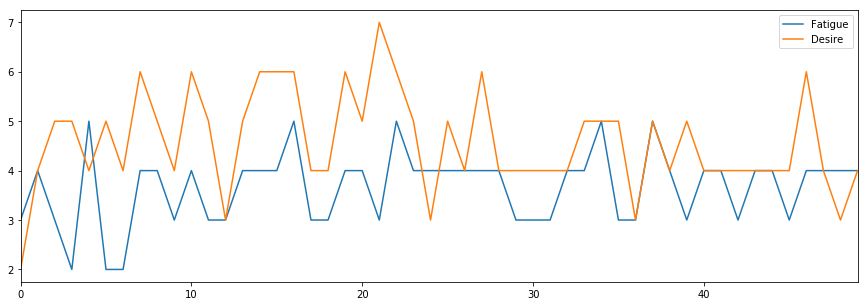

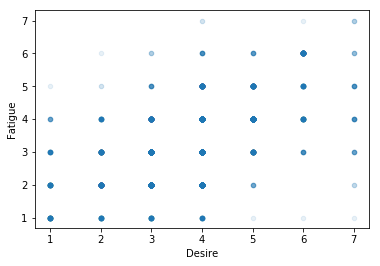

In [149]:
# Plotting the Fatigue and Desire relationship
ENTRIES = 50
df = pd.DataFrame({
    'Fatigue': data['wellness']['Fatigue'],
    'Desire': data['wellness']['Desire']
})
df.head(ENTRIES).plot.line(subplots=False, figsize=(15,5))
df.plot(kind="scatter", x="Desire", y="Fatigue", alpha=0.1)

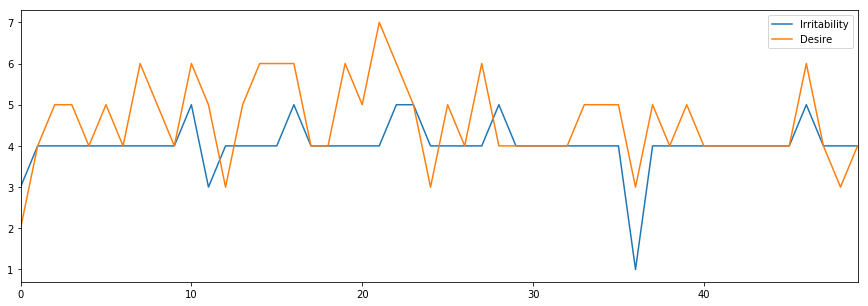

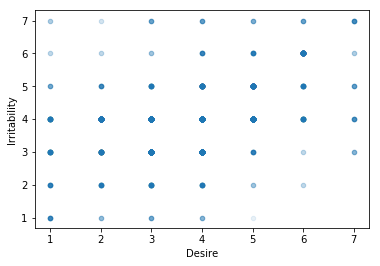

In [147]:
# Plotting the Desire and Irritability relationship
# ENTRIES = 50
# df = pd.DataFrame({
#     'Irritability': data['wellness']['Irritability'],
#     'Desire': data['wellness']['Desire']
# })
# df.head(ENTRIES).plot.line(subplots=False, figsize=(15,5))
# df.plot(kind="scatter", x="Desire", y="Irritability", alpha=0.1)

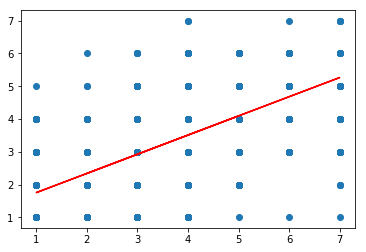

In [151]:
from sklearn.linear_model import LinearRegression

X = df["Desire"].values.reshape(-1, 1)  # values converts it into a numpy array
Y = df["Fatigue"].values.reshape(-1, 1)
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()